In [ ]:
!git clone https://github.com/CuzzImBatman/Crunch_1.git

Cloning into 'Crunch_1'...
remote: Enumerating objects: 451, done.
remote: Counting objects: 100% (192/192), done.
remote: Compressing objects: 100% (180/180), done.
remote: Total 451 (delta 112), reused 15 (delta 8), pack-reused 259 (from 1)
Receiving objects: 100% (451/451), 60.40 MiB | 11.88 MiB/s, done.
Resolving deltas: 100% (245/245), done.
Updating files: 100% (58/58), done.


In [ ]:
%cd Crunch_1

/content/Crunch_1


In [1]:
import gdown
url='https://drive.google.com/drive/folders/1s2CPuUK688TR-heZj1kMulO1nvZsXx_p?usp=drive_link'
gdown.download_folder(url, quiet=False)

Retrieving folder contents


Processing file 1XgdlZaAGT1XtVMPhHFzCZKcoQi6ydnBo DC1_cells.pkl
Processing file 1SgoKvjNFt7yvVDDcISh48qllEhsOmUK7 DC5_cells.pkl
Processing file 1SSFJNvqDIr4A2tDLlwmqeUyk_vHPzfbT UC1_I_cells.pkl
Processing file 1-Bq3LEE2rGfSbkE9Az0CAomLZL7JoPK9 UC1_NI_cells.pkl
Processing file 12LKj9leLB3TQ9R3Y3FNZvHtuwZR2Q-pr UC6_I_cells.pkl
Processing file 18FZlIIIzxOqoXNtDS2dpkmtUYL9B8qkF UC6_NI_cells.pkl
Processing file 1lLXgwNN80xAbKyK6B2Ll3OnNCBBX1kq4 UC7_I_cells.pkl
Processing file 1THtAFt3LYAu4bBFnLdDgQmAmNAg9vsqD UC9_I_cells.pkl


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1XgdlZaAGT1XtVMPhHFzCZKcoQi6ydnBo
To: /content/pre_load/DC1_cells.pkl
100%|██████████| 6.61M/6.61M [00:00<00:00, 153MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1SgoKvjNFt7yvVDDcISh48qllEhsOmUK7
From (redirected): https://drive.google.com/uc?id=1SgoKvjNFt7yvVDDcISh48qllEhsOmUK7&confirm=t&uuid=a1e85c4f-6f41-489f-a9f8-81d14a6b147b
To: /content/pre_load/DC5_cells.pkl
100%|██████████| 532M/532M [00:08<00:00, 65.4MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1SSFJNvqDIr4A2tDLlwmqeUyk_vHPzfbT
From (redirected): https://drive.google.com/uc?id=1SSFJNvqDIr4A2tDLlwmqeUyk_vHPzfbT&confirm=t&uuid=1689e556-2a96-4db0-8e3a-0b1079488f8f
To: /content/pre_load/UC1_I_cells.pkl
100%|██████████| 767M/767M [00:07<00:00, 97.7MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1-Bq3LEE2rGfSbkE

['/content/pre_load/DC1_cells.pkl',
 '/content/pre_load/DC5_cells.pkl',
 '/content/pre_load/UC1_I_cells.pkl',
 '/content/pre_load/UC1_NI_cells.pkl',
 '/content/pre_load/UC6_I_cells.pkl',
 '/content/pre_load/UC6_NI_cells.pkl',
 '/content/pre_load/UC7_I_cells.pkl',
 '/content/pre_load/UC9_I_cells.pkl']

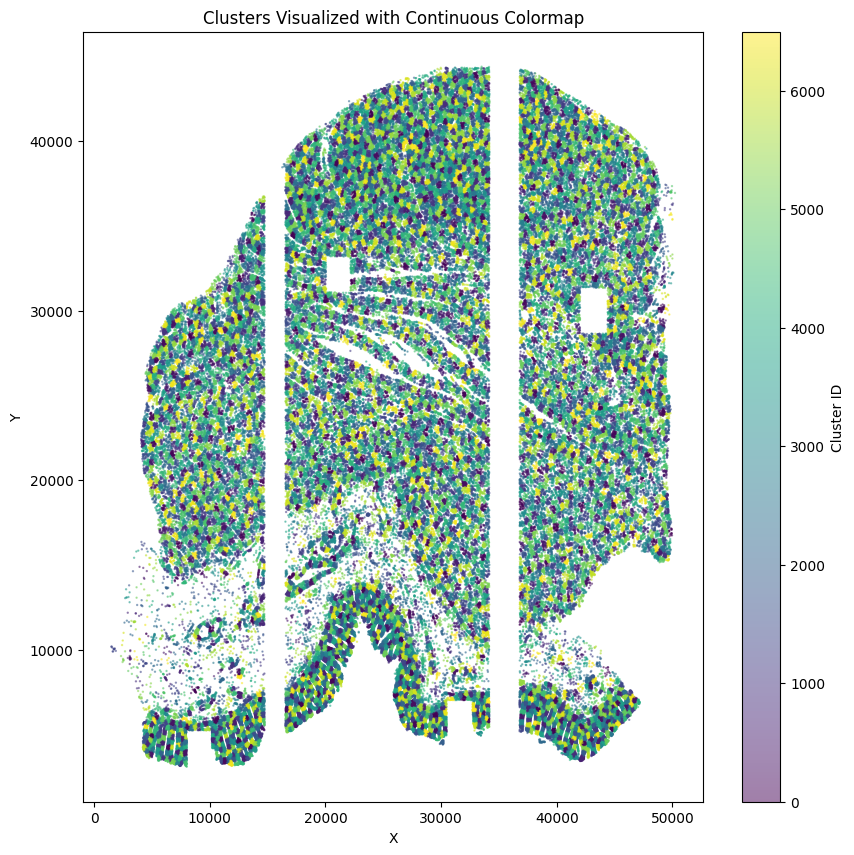

Streaming output truncated to the last 5000 lines.
Cluster 1501: Radius = 201.35677835715887
Cluster 1502: Radius = 303.78801683007737
Cluster 1503: Radius = 333.83573828203885
Cluster 1504: Radius = 210.16565060553933
Cluster 1505: Radius = 286.0971544600341
Cluster 1506: Radius = 194.84722220241903
Cluster 1507: Radius = 220.15927965536383
Cluster 1508: Radius = 262.0796951340692
Cluster 1509: Radius = 284.4621417156328
Cluster 1510: Radius = 270.0913271469485
Cluster 1511: Radius = 218.19846696907447
Cluster 1512: Radius = 308.55584988783005
Cluster 1513: Radius = 291.92308705787957
Cluster 1514: Radius = 394.3791879366168
Cluster 1515: Radius = 262.2432655399311
Cluster 1516: Radius = 261.36969134839643
Cluster 1517: Radius = 281.0199382739433
Cluster 1518: Radius = 194.5110920700059
Cluster 1519: Radius = 185.64935884941448
Cluster 1520: Radius = 206.65301758976028
Cluster 1521: Radius = 243.41295007851758
Cluster 1522: Radius = 220.49018905473596
Cluster 1523: Radius = 241.446665

In [10]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
NAMES = ['DC1','DC5', 'UC1_I', 'UC1_NI', 'UC6_I', 'UC6_NI', 'UC7_I', 'UC9_I']
for name in NAMES:
    with open(f'./pre_load/{name}_cells.pkl','rb') as f:
        cell_list= pickle.load(f)

    filtered_cells = [c for c in cell_list if c['label'] == 'train']
    cell_locations = pd.DataFrame([{'x': c['center'][1], 'y': c['center'][0],'cell_id': c['cell_id'],'counts':c['anucleus']} for c in filtered_cells])

    # Define the number of clusters
    n_clusters = 6500  # Adjust this based on your data and requirements

    # Perform K-Means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(cell_locations[['x', 'y']])

    # Add the cluster labels to the DataFrame
    cell_locations['cluster'] = kmeans.labels_

    # Visualize the clusters
    plt.figure(figsize=(10, 10))
    plt.scatter(
        cell_locations['x'],
        cell_locations['y'],
        c=cell_locations['cluster'],
        s=0.5,
        cmap='viridis',  # Continuous colormap
        alpha=0.5
    )
    plt.colorbar(label='Cluster ID')  # Add colorbar to interpret color mapping
    plt.title('Clusters Visualized with Continuous Colormap')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()
    os.makedirs('./cluster_data',exist_ok= True )
    with open(f'./cluster_data/{name}_cell.pkl','wb') as f:
        pickle.dump(cell_locations,f)
    with open(f'./cluster_data/{name}_kmeans.pkl','wb') as f:
        pickle.dump(kmeans,f)
    data = cell_locations[['x', 'y']].to_numpy()
    clusters = cell_locations['cluster'].to_numpy()
    centroids = kmeans.cluster_centers_

    # Initialize a dictionary to store the radius of each cluster
    cluster_radii = {}

    # Calculate radius for each cluster
    for cluster_id in range(len(centroids)):
        # Get points belonging to the current cluster
        cluster_points = data[clusters == cluster_id]

        # Calculate distances to the cluster centroid
        distances = np.linalg.norm(cluster_points - centroids[cluster_id], axis=1)

        # Radius is the maximum distance
        cluster_radii[cluster_id] = np.max(distances)

    # Print radii for all clusters
    list_r=[]
    for cluster_id, radius in cluster_radii.items():
        print(f"Cluster {cluster_id}: Radius = {radius}")
        list_r.append(radius)
    print(f'mean radius: {np.mean(list_r)}')


In [4]:
for c in cell_list:
  if c['label'] == 'validation':
    print(c)

Streaming output truncated to the last 5000 lines.
{'center': (11178.022156573117, 27960.636632200887), 'cell_id': 85919, 'label': 'validation', 'anucleus': array([], dtype=float64)}
{'center': (10120.87812041116, 27669.688693098386), 'cell_id': 85923, 'label': 'validation', 'anucleus': array([], dtype=float64)}
{'center': (9553.915141430949, 28060.64891846922), 'cell_id': 85928, 'label': 'validation', 'anucleus': array([], dtype=float64)}
{'center': (10353.265866209262, 27214.188679245282), 'cell_id': 85938, 'label': 'validation', 'anucleus': array([], dtype=float64)}
{'center': (11267.523474178404, 27135.3544600939), 'cell_id': 85939, 'label': 'validation', 'anucleus': array([], dtype=float64)}
{'center': (10512.174846625767, 27301.803680981597), 'cell_id': 85951, 'label': 'validation', 'anucleus': array([], dtype=float64)}
{'center': (9795.1875, 27980.3359375), 'cell_id': 85952, 'label': 'validation', 'anucleus': array([], dtype=float64)}
{'center': (10715.848587570621, 27993.777401

KeyboardInterrupt: 

In [ ]:
for name in NAMES:
      dir= './train/cluster_data'
      with open(f'{dir}/{name}_cell.pkl','rb') as f:
            cell_locations=pickle.load(f)
      with open(f'{dir}/{name}_kmeans.pkl','rb') as f:
            kmeans=pickle.load(f)
      data = cell_locations[['x', 'y']].to_numpy()
      clusters = cell_locations['cluster'].to_numpy()
      centroids = kmeans.cluster_centers_

      cell_locations['train']=[1]*kmeans.labels_.shape[0]
      # Initialize a dictionary to store the radius of each cluster
      valid_cluster_id=[]
      valid_centroid=[]
      # Calculate radius for each cluster
      for cluster_id in range(len(centroids)):
            x_center, y_center = centroids[cluster_id]

            half_side = int(256 / 2)
            x_min, x_max = x_center - half_side, x_center + half_side
            y_min, y_max = y_center - half_side, y_center + half_side
            
            index_cells_list_in_square =(
            (cell_locations['x'] >= x_min) & (cell_locations['x'] <= x_max) &
            (cell_locations['y'] >= y_min) & (cell_locations['y'] <= y_max)
            )
            # Get points belonging to the current cluster
            cluster_points = data[clusters == cluster_id]

            # Calculate distances to the cluster centroid
            if len(cluster_points)<=5 or len(index_cells_list_in_square)<=5:
                  cell_locations.loc[cell_locations['cluster'] == cluster_id, 'train']=-1
            # valid_cluster_id.append(cluster_id)
            # print(len(cluster_points))
      unique_cluster_ids = cell_locations.loc[cell_locations['train'] == 1, 'cluster'].unique()

      split = np.random.choice(unique_cluster_ids, int(0.1*len(unique_cluster_ids)), replace=False)
      for cluster_id in split:
            cell_locations.loc[cell_locations['cluster'] == cluster_id, 'train']=0
      os.makedirs('.train/cluster_data_split',exist_ok= True )
      with open(f'.train/cluster_data_split/{name}_cell.pkl', 'wb') as f:
            pickle.dump(cell_locations, f)
      with open(f'.train/cluster_data_split/{name}_kmeans.pkl','wb') as f:
            pickle.dump(kmeans,f)

In [3]:
!cd

C:\DATA\Crunch\cluster


In [2]:
import pickle,os
NAMES=['DC1','DC5', 'UC1_I', 'UC1_NI', 'UC6_I', 'UC6_NI', 'UC7_I', 'UC9_I']
for name in NAMES:
        dir= './train/cluster_data_split_old'
        # dir= new_dir
        with open(f'{dir}/{name}_cells.pkl','rb') as f:
                cell_locations=pickle.load(f)
        with open(f'{dir}/{name}_kmeans.pkl','rb') as f:
                kmeans=pickle.load(f)
        data = cell_locations[['x', 'y']].to_numpy()
        clusters = cell_locations['cluster'].to_numpy()
        centroids = kmeans.cluster_centers_

        # cell_locations['train']=[1]*kmeans.labels_.shape[0]
        # Initialize a dictionary to store the radius of each cluster
        valid_cluster_id=[]
        valid_centroid=[]
        # Calculate radius for each cluster
        i=0
        ques=0
        test=cell_locations.loc[cell_locations['train'] == 0, 'cluster'].unique()
        print(len(test))
        for cluster_id in range(len(centroids)):
            x_center, y_center = centroids[cluster_id]

            half_side = int(256 / 2)
            x_min, x_max = x_center - half_side, x_center + half_side
            y_min, y_max = y_center - half_side, y_center + half_side
            cells_list_in_cluster = cell_locations[cell_locations['cluster'] == cluster_id]
            index_cells_list_in_square =(
            (cells_list_in_cluster['x'] >= x_min) & (cells_list_in_cluster['x'] <= x_max) &
            (cells_list_in_cluster['y'] >= y_min) & (cells_list_in_cluster['y'] <= y_max)
            )
            # Get points belonging to the current cluster
            cluster_points = data[clusters == cluster_id]

            # Calculate distances to the cluster centroid
            
            if  len(index_cells_list_in_square)<=0:
                    
                    i+=1
                    
                    
                    cell_locations.loc[cell_locations['cluster'] == cluster_id, 'train']=-1
            # valid_cluster_id.append(cluster_id)
            # print(len(cluster_points))
        # print(i)
        test=cell_locations.loc[cell_locations['train'] == 0, 'cluster'].unique()
        print(len(test))
        unique_cluster_ids = cell_locations.loc[cell_locations['train'] == 1, 'cluster'].unique()
        print(i,ques, len(unique_cluster_ids))
        new_dir='./train/cluster_data_split'
        # os.makedirs(f'{new_dir}',exist_ok= True )
        # print(len(cell_locations))
        # with open(f'{new_dir}/{name}_cells.pkl', 'wb') as f:
        #         pickle.dump(cell_locations, f)
        # with open(f'{new_dir}/{name}_kmeans.pkl','wb') as f:
        #         pickle.dump(kmeans,f)

E:\conda\envs\thitogene\lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator KMeans from version 1.5.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


645
645
0 0 5808
187577


E:\conda\envs\thitogene\lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator KMeans from version 1.5.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


631
631
0 0 5688
140368


E:\conda\envs\thitogene\lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator KMeans from version 1.5.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


645
645
0 0 5805
202534


E:\conda\envs\thitogene\lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator KMeans from version 1.5.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


465
465
0 0 4194
80037


E:\conda\envs\thitogene\lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator KMeans from version 1.5.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


633
633
0 0 5706
223790


E:\conda\envs\thitogene\lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator KMeans from version 1.5.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


565
565
0 0 5093
101485


E:\conda\envs\thitogene\lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator KMeans from version 1.5.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


639
639
0 0 5755
144704


E:\conda\envs\thitogene\lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator KMeans from version 1.5.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


635
635
0 0 5722
196937


In [1]:
import pickle,os
NAMES=['DC1','DC5', 'UC1_I', 'UC1_NI', 'UC6_I', 'UC6_NI', 'UC7_I', 'UC9_I']
for name in NAMES:
        dir= '../cluster_data_split'
        # dir= new_dir
        with open(f'{dir}/{name}_cells.pkl','rb') as f:
                cell_locations=pickle.load(f)
        with open(f'{dir}/{name}_kmeans.pkl','rb') as f:
                kmeans=pickle.load(f)
        data = cell_locations[['x', 'y']].to_numpy()
        clusters = cell_locations['cluster'].to_numpy()
        centroids = kmeans.cluster_centers_

        # cell_locations['train']=[1]*kmeans.labels_.shape[0]
        # Initialize a dictionary to store the radius of each cluster
        valid_cluster_id=[]
        valid_centroid=[]
        # Calculate radius for each cluster
        i=0
        ques=0
        test=cell_locations.loc[cell_locations['train'] == 0, 'cluster'].unique()
        print(len(test))
        for cluster_id in range(len(centroids)):
            x_center, y_center = centroids[cluster_id]

            half_side = int(256 / 2)
            x_min, x_max = x_center - half_side, x_center + half_side
            y_min, y_max = y_center - half_side, y_center + half_side
            cells_list_in_cluster = cell_locations[cell_locations['cluster'] == cluster_id]
            index_cells_list_in_square =(
            (cells_list_in_cluster['x'] >= x_min) & (cells_list_in_cluster['x'] <= x_max) &
            (cells_list_in_cluster['y'] >= y_min) & (cells_list_in_cluster['y'] <= y_max)
            )
            # Get points belonging to the current cluster
            cluster_points = data[clusters == cluster_id]

            # Calculate distances to the cluster centroid
            
            if  len(index_cells_list_in_square)<=0:
                    
                    i+=1
                    
                    
                    cell_locations.loc[cell_locations['cluster'] == cluster_id, 'train']=-1
            # valid_cluster_id.append(cluster_id)
            # print(len(cluster_points))
        # print(i)
        test=cell_locations.loc[cell_locations['train'] == 0, 'cluster'].unique()
        print(len(test))
        unique_cluster_ids = cell_locations.loc[cell_locations['train'] == 1, 'cluster'].unique()
        print(i,ques, len(unique_cluster_ids))
        new_dir='./train/cluster_data_split'
        # os.makedirs(f'{new_dir}',exist_ok= True )
        # print(len(cell_locations))
        # with open(f'{new_dir}/{name}_cells.pkl', 'wb') as f:
        #         pickle.dump(cell_locations, f)
        # with open(f'{new_dir}/{name}_kmeans.pkl','wb') as f:
        #         pickle.dump(kmeans,f)

E:\conda\envs\thitogene\lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator KMeans from version 1.5.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


645
645
0 0 5808


E:\conda\envs\thitogene\lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator KMeans from version 1.5.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


631
631
0 0 5688


E:\conda\envs\thitogene\lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator KMeans from version 1.5.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


645
645
0 0 5805


E:\conda\envs\thitogene\lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator KMeans from version 1.5.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


465
465
0 0 4194


E:\conda\envs\thitogene\lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator KMeans from version 1.5.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


633
633
0 0 5706


E:\conda\envs\thitogene\lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator KMeans from version 1.5.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


565
565
0 0 5093


E:\conda\envs\thitogene\lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator KMeans from version 1.5.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


639
639
0 0 5755


E:\conda\envs\thitogene\lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator KMeans from version 1.5.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


635
635
0 0 5722


In [ ]:
dir

: 

In [ ]:
# kmeans.labels_.shape ,kmeans.cluster_centers_.shape
C:\DATA\Crunch\cluster\train\cluster_data_split\DC1_cells.pkl
cell_locations.loc[cell_locations['cluster'] == 2, 'train']

,x
162921,47525.298387
163221,47846.783854
163346,47839.651099
163389,47631.646925
163435,47713.218182
163483,47834.005882
163505,47494.680233
163714,47605.710078
163736,47811.087193
163805,47832.995868


In [ ]:
with open(f'./cluster_data/UC1_I_kmeans.pkl','rb') as f:
        kmeans=pickle.load(f)


In [ ]:
len(random_elements)

700

In [ ]:
data = cell_locations[['x', 'y']].to_numpy()
clusters = cell_locations['cluster'].to_numpy()
centroids = kmeans.cluster_centers_

# Initialize a dictionary to store the radius of each cluster
cluster_radii = {}

# Calculate radius for each cluster
count=0
for cluster_id in range(len(centroids)):
    # Get points belonging to the current cluster
    cluster_points = data[clusters == cluster_id]

    # Calculate distances to the cluster centroid
    if len(cluster_points)<=200:
      # print(len(cluster_points))
      count+=1
print(count)


5000


In [12]:
!zip -r ./cluster_data_split.zip ./cluster_data_split

  adding: cluster_data_split/ (stored 0%)
  adding: cluster_data_split/DC5_kmeans.pkl (deflated 54%)
  adding: cluster_data_split/UC6_NI_cell.pkl (deflated 98%)
  adding: cluster_data_split/UC6_I_kmeans.pkl (deflated 58%)
  adding: cluster_data_split/UC1_NI_cell.pkl (deflated 97%)
  adding: cluster_data_split/UC1_I_kmeans.pkl (deflated 57%)
  adding: cluster_data_split/UC1_I_cell.pkl (deflated 98%)
  adding: cluster_data_split/UC7_I_cell.pkl (deflated 98%)
  adding: cluster_data_split/UC9_I_kmeans.pkl (deflated 58%)
  adding: cluster_data_split/UC1_NI_kmeans.pkl (deflated 48%)
  adding: cluster_data_split/DC5_cell.pkl (deflated 98%)
  adding: cluster_data_split/UC6_NI_kmeans.pkl (deflated 50%)
  adding: cluster_data_split/DC1_kmeans.pkl (deflated 60%)
  adding: cluster_data_split/UC9_I_cell.pkl (deflated 98%)
  adding: cluster_data_split/DC1_cell.pkl (deflated 88%)
  adding: cluster_data_split/UC6_I_cell.pkl (deflated 98%)
  adding: cluster_data_split/UC7_I_kmeans.pkl (deflated 53%)


In [13]:
!zip -r ./cluster_data.zip ./cluster_data

  adding: cluster_data/ (stored 0%)
  adding: cluster_data/DC5_kmeans.pkl (deflated 54%)
  adding: cluster_data/UC6_NI_cell.pkl (deflated 98%)
  adding: cluster_data/UC6_I_kmeans.pkl (deflated 58%)
  adding: cluster_data/UC1_NI_cell.pkl (deflated 97%)
  adding: cluster_data/UC1_I_kmeans.pkl (deflated 57%)
  adding: cluster_data/UC1_I_cell.pkl (deflated 98%)
  adding: cluster_data/UC7_I_cell.pkl (deflated 98%)
  adding: cluster_data/UC9_I_kmeans.pkl (deflated 58%)
  adding: cluster_data/UC1_NI_kmeans.pkl (deflated 48%)
  adding: cluster_data/DC5_cell.pkl (deflated 98%)
  adding: cluster_data/UC6_NI_kmeans.pkl (deflated 50%)
  adding: cluster_data/DC1_kmeans.pkl (deflated 60%)
  adding: cluster_data/UC9_I_cell.pkl (deflated 98%)
  adding: cluster_data/DC1_cell.pkl (deflated 87%)
  adding: cluster_data/UC6_I_cell.pkl (deflated 98%)
  adding: cluster_data/UC7_I_kmeans.pkl (deflated 53%)
